
# Advisory mission for the Boston municipal authorities


![title](assets/boston_logo.png)

Welcome to the Decision Science exercise of your data certification exam!

Here are a few words to describe how the `decision_science` directory is organised:

In [1]:
# Start by running this cell to see the architecture of the directory
!tree

.
├── README.md
├── __pycache__
│   └── data.cpython-38.pyc
├── boston_crimes.ipynb
├── boston_crimes_presentation.pptx
├── data
│   ├── districts.csv
│   └── incident_reports.csv
├── data.py
├── db
│   ├── boston_crimes.sqlite
│   ├── boston_crimes.xml
│   ├── boston_crimes_regression.csv
│   └── boston_crimes_regression.sqlite
├── tests
│   ├── answers_inference.json
│   ├── linear_regression_analysis.pickle
│   ├── linear_regression_model.pickle
│   ├── manipulation.pickle
│   └── sql.pickle
└── ~$boston_crimes_presentation.pptx

4 directories, 17 files


- the `boston_crimes.ipynb` notebook that you currently have under your eyes is the main document. You will find all the instructions here and except when it is explicitly specified, you should provide all your answers in this notebook;


- the `data` and `db` folders will be filled-in throughout the exercise respectively with `.csv` datasets and a `.sqlite` file, for you to run all your analyses; 


- you will not have to interact with the `assets` folder for this exercise;


- the `tests` folder will contain all the `.pickle` files that will be saved throughout the exercise with your key findings. Please run all the "Save your results" cells when completing the exercise!

⚠️ **Important remark** before you dive into the exercise. This notebook is quite long and it is easy to get lost in it: take full advantage of the collapsible headers and of the table of content. If you have not yet activated these Jupyter Notebook extensions, you may consider doing so now!

# Imports

You can use this section to run your imports in a centralised manner throughout the exercise.

In [2]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [3]:
# Useful import for data collection
import sqlite3

In [4]:
# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

In [5]:
# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Useful imports to estimate regression models
import statsmodels.formula.api as smf

# 1. Analysis for the mayor's team

During the last municipal campaign in Boston, criminality has been a major topic of debates. As citizens have expressed strong expectations from her on that front, the newly-elected mayor of Boston is looking for data-based insights on criminality in the Massachussetts capital. She has mandated your economics and urbanism consulting firm, *The Locomotive*, for this study.

## 1.1 Load the database

Download the `boston_crimes.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite) and store it inside the `db` folder.

In [7]:
# You may directly run this cell to do so
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes.sqlite > db/boston_crimes.sqlite
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  9912k      0  0:00:01  0:00:01 --:--:-- 9907k


## 1.2 Familiarize yourself with the database

This section aims at giving you a first overview of the database. 

As you will see, it consists in three tables: 

- the `incident_reports` table has been provided by the Police Department of Boston. Each observation corresponds to a criminal incident that has required an intervention by the police in the municipality of Boston;  



- the `districts` table has been provided by the Urbanism Department of Boston. It gathers geographical information about the various police districts of Boston;  



- and the `indicators` table has been shared by the Economics Department of Boston, which keeps track of various indicators of the social and economic activity of Boston neighborhoods. Each observation corresponds to a police district.

More information about the different fields of these three tables can be found in the dedicated `README.md` file

### Connect to the database

**🔍 Using your preferred SQL client, connect to the database and browse through it as you wish to get acquainted with the data.**

### Draw a schema of the database

**📝 Draw the database schema thanks to the [schema editor](https://kitt.lewagon.com/db) on Kitt.**

**📝 Download the schema and save it as `boston_crimes.xml` in the `db` folder.**

## 1.3 Extract the relevant dataset

Now that you have a good overview of the database, you can kick off the work! You will start with an SQL query to gather the relevant information.

### Build the dataset

We want to investigate the influence of the socio-economic characteristics of Boston's different districts on the number of crime reports and incidents. To do so, we need to extract the relevant dataset. **Each row should correspond to one of the 12 police districts of Boston** (as listed in the `districts` table of the database).

To identify the district, we will need **the following columns**: 

- the `CODE` of the police district (1 letter and 1 or 2 numbers);
- the full `NAME` of the police district.

Additionally, you will need to **create an additional field** (which will serve as dependent variable in future regressions): `NB_INCIDENTS`, i.e. the total number of incidents reported in the police district over the period covered by the data at hand (2015-2019).

Eventually, we want the dataset to **include several socio-economic indicators**:

- `MEDIAN_AGE`;
- `TOTAL_POP`;
- `PERC_OF_30_34`;
- `PERC_MARRIED_COUPLE_FAMILY`;
- `PER_CAPITA_INCOME`;
- `PERC_OTHER_STATE_OR_ABROAD`;
- `PERC_LESS_THAN_HIGH_SCHOOL`;
- `PERC_COLLEGE_GRADUATES`. 

Overall, your dataset should comprise 12 rows and 11 columns.

Eventually, note that **the resulting DataFrame must be ordered by the number of incidents**, from the largest to the smallest total.

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [8]:
query = """
SELECT d.CODE, d.NAME, COUNT(INCIDENT_NUMBER) as NB_INCIDENTS, 
MEDIAN_AGE, TOTAL_POP, PERC_OF_30_34, PERC_MARRIED_COUPLE_FAMILY, PER_CAPITA_INCOME, 
PERC_OTHER_STATE_OR_ABROAD, PERC_LESS_THAN_HIGH_SCHOOL, PERC_COLLEGE_GRADUATES
from districts d
JOIN indicators i on d.CODE = i.CODE
JOIN incident_reports ir on d.CODE = ir.DISTRICT
GROUP BY d.CODE

"""

**📝 Store the output of the query in a `DataFrame` named `crimes_df`. Display the 5 first rows, as well as the shape of the dataset.**

In [9]:
# YOUR CODE HERE

conn = sqlite3.connect('db/boston_crimes.sqlite')
c = conn.cursor()
c.execute(query)
results = c.fetchall()

col_names = ['CODE', 'NAME', 'NB_INCIDENTS', 
'MEDIAN_AGE', 'TOTAL_POP', 'PERC_OF_30_34', 'PERC_MARRIED_COUPLE_FAMILY', 'PER_CAPITA_INCOME', 
'PERC_OTHER_STATE_OR_ABROAD', 'PERC_LESS_THAN_HIGH_SCHOOL', 'PERC_COLLEGE_GRADUATES']
crimes_df = pd.DataFrame(results, columns = col_names)

print(crimes_df.shape)
crimes_df.head()

(12, 11)


,CODE,NAME,NB_INCIDENTS,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES
0,A1,Downtown,26260,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9
1,A15,Charlestown,4765,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2
2,A7,East Boston,9691,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5
3,B2,Roxbury,38877,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9
4,B3,Mattapan,28331,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9


### Save your results

You can run the following cell to save your results:

In [10]:
ChallengeResult('sql', query=query, data=crimes_df).write()

## 1.4 Linear regression - The socio-economic determinants of criminality

As mentioned above, we want to investigate the impact of the socio-economic characteristics of the different Boston police districts on the number of incidents that are reported in these areas. 
- We are going to use the number of incidents as dependent variable 
- our regressors will be the various socio-economic indicators extracted from the database.

### 1.4.1 Start from a fresh dataset

To make sure that you are using the right data, you can load a fresh dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/regression.csv).

**📝 Load the data into a DataFrame named `data`**

In [11]:
# YOUR CODE HERE
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/boston_crimes_regression.csv > db/boston_crimes_regression.csv
data = pd.read_csv('db/boston_crimes_regression.csv')
data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   935  100   935    0     0   1366      0 --:--:-- --:--:-- --:--:--  1364


,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston
5,39.4,38924,21.1,38.4,32744,1.9,13.8,21.3,E18,12551,Hyde Park
6,34.8,40867,32.5,33.7,51655,5.5,8.0,12.1,E13,12802,Jamaica Plain
7,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9,B3,28331,Mattapan
8,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9,B2,38877,Roxbury
9,31.9,36772,46.1,24.7,64745,2.4,7.9,8.4,C6,16617,South Boston


### 1.4.2 Run the regression and output its summary

Thanks to the Statsmodels Formula API, we will run the regression described below. 

The dependent variable (or target variable) should be **the total number of incidents** reported in each police district.

We will focus on the following regressors: 

- the **median age** in the district, whose effect is difficult to anticipate on the number of crimes;
 
 
- the **percentage of 30-34 years old** in the district, whose effect is also unclear a priori;
 
 
- the **share of families with a married couple** among all households, which could be anticipated to have a negative effect on criminality (more attention to safety among residents...);
 
 
- the **percentage of residents having moved from abroad or from another US state over the last year**, mobility being often associated with social marginalisation and possibly with a higher risk of resorting to illegal activities;
 
 
- the **percentage of residents having stopped their studies before getting a high school degree**. Economic models would suggest that due to the more narrow job opportunities to which this group has access, the incentive is stronger to resort to illicit activities;
 
 
- the **percentage of college graduates** in the district, which we would expect to have an opposite effect.
 
**📝 Based on these indications, estimate the linear regression model and output its summary in this section of the notebook. Store the estimated model inside a `model` variable.**

In [12]:
# YOUR CODE HERE
model = smf.ols(formula='NB_INCIDENTS ~ MEDIAN_AGE + PERC_OF_30_34 + PERC_MARRIED_COUPLE_FAMILY + \
PERC_OTHER_STATE_OR_ABROAD + PERC_LESS_THAN_HIGH_SCHOOL + PERC_COLLEGE_GRADUATES', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           NB_INCIDENTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     7.391
Date:                Tue, 29 Jun 2021   Prob (F-statistic):             0.0222
Time:                        17:22:47   Log-Likelihood:                -114.59
No. Observations:                  12   AIC:                             243.2
Df Residuals:                       5   BIC:                             246.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/Users/leonardtheret/.pyenv/versions/3.8.6/envs/data/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Save your results

You can run the following cell to save your results:

In [13]:
ChallengeResult(
    'linear_regression_model',
    data=data,
    model=model
).write()

### 1.4.3 Statistical inference questions 🤯

You will now be asked a series of statistical inference and methodological questions about the regression model estimated above. Don't worry if results do not perfectly fit the "predictions" that we made earlier about the impact of each regressor: the goal was to form an *a priori* hypothesis, which is validated or invalidated through this empirical analysis.

#### Questions on the results

**❓ Is the median age associated with a positive (increasing the number of crimes) or a negative (decreasing the target variable) effect on the number of crime incidents? Simply write your answer as a string below**

In [14]:
answer_median_age = '''The coefficient the MEDIAN_AGE intercept is 2252.7344, \
meaning this variable has a positive effect on the number of crime incidents.'''
answer_median_age

'The coefficient the MEDIAN_AGE intercept is 2252.7344, meaning this variable has a positive effect on the number of crime incidents.'

**❓ What is the t-statistic associated with the median age regressor? How is it computed?**

💡 Hint: We are looking at a ratio

In [15]:
answer_t_statistic = '''t-statistic, p-value and 95% confidence interval correspond to the null hypothesis. \
t-statistics is similar to the standard deviation in how it works. The formula is (coef - (P>|t|)) / std err'''
answer_t_statistic

't-statistic, p-value and 95% confidence interval correspond to the null hypothesis. t-statistics is similar to the standard deviation in how it works. The formula is (coef - (P>|t|)) / std err'

**📝 Recompute approximately the t-statistic based on the regression summary.**

As it is a ratio $t = \frac{numerator}{denominator}$:
- Store the numerator into a `numerator` variable
- Store the denominator into a `denominator` variable
- Store the t-statistic into a `t_median_age` variable

In [16]:
numerator = 2252.7344 - 0.128
denominator = 1237.522
t_median_age = numerator/denominator
t_median_age

1.820255639899735

**❓ What is the p-value associated with the median age regressor? Store it in the `pvalue_median_age` variable (you may directly copy-paste it from the regression summary).** 

In [17]:
# YOUR CODE HERE
pvalue_median_age = 0.128

**❓ What does this p-value mean for the median age? Is its effect statistically significant at the 95% confidence level? At the 90% confidence level? Simply formulate your answer in the cell below.**

In [18]:
answer_p_value = """Proba that what you observed is just due to pure chance. \
At a 95% confidence level, that proba is 12.8%, which > 5%. \
We can't reject H0 that states that the median age has no influence."""
answer_p_value

"Proba that what you observed is just due to pure chance. At a 95% confidence level, that proba is 12.8%, which > 5%. We can't reject H0 that states that the median age has no influence."

**❓ What are the two regressors whose effect is statistically significant at the 95% confidence level in this regression model? Store the name of the variables as a list of strings in the `significant_regressors` variable.**

In [19]:
# YOUR CODE HERE
significant_regressors = ['PERC_MARRIED_COUPLE_FAMILY', 'PERC_OTHER_STATE_OR_ABROAD']
significant_regressors

['PERC_MARRIED_COUPLE_FAMILY', 'PERC_OTHER_STATE_OR_ABROAD']

**❓ Holding all other regressors constant, by how much does the total number of incidents increase or decrease when the share of families with a married couple increases by 1 percentage point in the district? Please formulate a full sentence with statistical rigor!**

In [20]:
answer_how_much_increase = """Holding all other regressors constant, when the share of families with a \
married couple increases by 1 percentage point in the district, the total number of incidents decreases \
by 2115.1839, on average."""
answer_how_much_increase

'Holding all other regressors constant, when the share of families with a married couple increases by 1 percentage point in the district, the total number of incidents decreases by 2115.1839, on average.'

#### Limits of this regression model

You had asked the intern on the team to estimate a linear regression model so as to investigate the socio-economic determinants of crime in Boston. The results above are those that he presented. In the email he sent to you, he added:

> *You will probably notice the extremely high R-squared score of this model: I think we have an excellent fit and the results are solid* 😄

But you have very strong doubts about this regression and you think it is a perfect occasion to give some very important advice to your intern...

**❓  What is the main limitation of this (clearly spurious) regression according to you? This observation explains why we are getting a very high R-squared and large standard errors. Please provide your answer in the following Markdown cell.**

In [21]:
answer_limitations = """The F-statistic appears to be pretty low. Also, theCond. No. of 2.42e+03 is pretty \
high, which may indicate strong multicolinearity. The dataset is also pretty small, which may mean we would \
need data from more districts to have confidence in our deductions."""
answer_limitations

'The F-statistic appears to be pretty low. Also, theCond. No. of 2.42e+03 is pretty high, which may indicate strong multicolinearity. The dataset is also pretty small, which may mean we would need data from more districts to have confidence in our deductions.'

### Save your results

You can run the following cell to save your results:

In [22]:
import json
answers_inference = {"MEDIAN_AGE": answer_median_age,
                    "T_STAT":answer_t_statistic,
                     "P_VALUE": answer_p_value,
                     "INCREASE": answer_how_much_increase,
                     "LIMITATIONS": answer_limitations}

with open("tests/answers_inference.json", "w", encoding="utf-8") as f:
    json.dump(answers_inference, f, ensure_ascii=False, indent=4)

ChallengeResult(
    'linear_regression_analysis',
    model=model,
    numerator=numerator,
    denominator=denominator,
    t=t_median_age,
    pvalue=pvalue_median_age,
    regressors=significant_regressors
).write()

# 2. Analysis for the police department

The head of the Police Department of Boston, who read your report for the Mayor's team, was extremely interested in the results. He contacted your consulting firm for an additional presentation, that would focus on the nature of crimes that take place in Boston, the potential time trends that you could identify and/or the heterogeneity of the impact of criminality on the different police districts. 

## 2.1 Start with a fresh dataset

You will start from a fresh dataset, that corresponds more or less to the `incident_reports` table of the database.

In [23]:
# Run this cell to download the datasets in the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  9242k      0  0:00:02  0:00:02 --:--:-- 9242k0  2097k      0  0:00:09  0:00:01  0:00:08 2096k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0    685      0 --:--:-- --:--:-- --:--:--   684


In [24]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


## 2.1 Further data manipulations

In this section, we are going to answer two specific questions that the head of the Police Department of Boston asked your team, about the characteristics of the incidents that occur in the various districts of the municipality.

### 2.1.1 Most represented type of incident per district

First, the head of the Police Department of Boston wants to know what incident category is most often found in each district. 

**📝 Construct a DataFrame with**
- **one row per police district, designated by its full name**
- **one text column that indicates the name of the most common category of incident in the district over the whole sample period.**

💡 Hint: you may need to first define a custom aggregation function.

In [25]:
def agg_func(x):
    x = x.value_counts().index[0]
    return x

data[['NAME','OFFENSE_CODE_GROUP']].groupby('NAME').agg(agg_func)

,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


**❓ Can you tell what is the second most common offense int the Brighton district?**

In [26]:
data[['OFFENSE_CODE_GROUP']][data['NAME'] == 'Brighton'].value_counts()

OFFENSE_CODE_GROUP            
Larceny and vandalism             5274
Police investigation procedure    2783
Fraud and law violations          1807
Violence and harassment           1627
Other                              925
Drugs and disorderly conduct       809
Disputes                           563
dtype: int64

In [27]:
second_most_common_offence = "Police investigation procedure "

### Average distance to the police station per district

Second, based on the Haversine distance function defined below, the head of the Police Department would like to know, for each district, **the average distance between the location of the incident and the police station**. 

**📝 Construct a DataFrame with one row per police district, designated by its full name, and one column that displays this average Haversine distance.**

In [28]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [29]:
inter = data[['NAME','LAT', 'LONG', 'LAT_POLICE_STATION', 'LONG_POLICE_STATION']]
inter['Haversine distance'] = inter['LONG']
for i in range(len(inter['NAME'])):
    inter['Haversine distance'][i] = haversine_distance(inter['LONG'][i], inter['LAT'][i], inter['LONG_POLICE_STATION'][i], inter['LAT_POLICE_STATION'][i])
inter

<ipython-input-29-784fc042ea05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter['Haversine distance'] = inter['LONG']
<ipython-input-29-784fc042ea05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter['Haversine distance'][i] = haversine_distance(inter['LONG'][i], inter['LAT'][i], inter['LONG_POLICE_STATION'][i], inter['LAT_POLICE_STATION'][i])
/Users/leonardtheret/.pyenv/versions/3.8.6/envs/data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,NAME,LAT,LONG,LAT_POLICE_STATION,LONG_POLICE_STATION,Haversine distance
0,Roxbury,42.330119,-71.084251,42.328894,-71.085359,0.163832
1,Roxbury,42.315142,-71.067047,42.328894,-71.085359,2.145919
2,Roxbury,42.312243,-71.075499,42.328894,-71.085359,2.021175
3,Roxbury,42.312243,-71.075499,42.328894,-71.085359,2.021175
4,Roxbury,42.312243,-71.075499,42.328894,-71.085359,2.021175
...,...,...,...,...,...,...
237216,Charlestown,42.355216,-71.060129,42.361800,-71.060300,0.732215
237217,Charlestown,42.355216,-71.060129,42.361800,-71.060300,0.732215
237218,Charlestown,42.376852,-71.068873,42.361800,-71.060300,1.815839
237219,Charlestown,42.376852,-71.068873,42.361800,-71.060300,1.815839


In [30]:
inter.drop(columns = ['LAT','LONG','LAT_POLICE_STATION','LONG_POLICE_STATION'], inplace = True)
final = inter.groupby('NAME').mean()
final

/Users/leonardtheret/.pyenv/versions/3.8.6/envs/data/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Haversine distance
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


**❓ Can you tell what is the average distance between the police station and the offenses in the Brighton district?**

In [31]:
# YOUR CODE HERE
average_distance_km = final.loc['Brighton'][0]

In [32]:
result = ChallengeResult('manipulation',
                         second_most_common_offence=second_most_common_offence,
                         average_distance_km=average_distance_km)
result.write()

# 3. Short presentation (REQUIRED TO VALIDATE THE CERTIFICATION)
🚨🚨🚨🚨🚨🚨

Using the latest dataset that you loaded, your mission is now to prepare 5 slides (including a title slide) that you would present to the head of the Police Department. You may or may not, as you prefer, include the output of the two "Further data manipulations" tasks in your presentation.

⚠️  You can use any presentation editor of your choice, but **the slides must be shared either in HTML or in PDF format and saved in the current directory**

Before you get started, here are four small pieces of advice:

- to prepare your data visualisations, do not hesitate to create a separate, blank notebook; 


- pay particular attention to the readability and the clarity of your legends, titles, charts and tables; 


- the Pandas `resample` method might be useful if you want to plot time trends;


- keep in mind that you are working with real data and sometimes, data are not very talkative. Do not feel discouraged if your charts do not provide revolutionary insights: typically, an absence of trend is a substantial piece of information!

Good luck in changing Boston residents' lives!

In [33]:
inter2 = data[['OFFENSE_CODE_GROUP','SHOOTING','OCCURRED_ON_DATE','NAME']]
inter2['HAVERSINE_DISTANCE'] = inter['Haversine distance']
inter2.drop_duplicates(inplace = True)
pd.to_datetime(inter2['OCCURRED_ON_DATE'])
inter2['OCCURRED_ON_DATE'] = inter2['OCCURRED_ON_DATE'].apply(pd.to_datetime)
inter2['WEEKDAY'] = inter2['OCCURRED_ON_DATE'].dt.dayofweek

<ipython-input-33-f3b80ba3e07b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter2['HAVERSINE_DISTANCE'] = inter['Haversine distance']
<ipython-input-33-f3b80ba3e07b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter2.drop_duplicates(inplace = True)
<ipython-input-33-f3b80ba3e07b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [34]:
def num_to_week(x):
    if x == 0:
        x = 'Monday'
    elif x == 1:
        x = 'Tuesday'
    elif x == 2:
        x = 'Wednesday'
    elif x == 3:
        x = 'Thursday'
    elif x == 4:
        x = 'Friday'
    elif x == 5:
        x = 'Saturday'
    else :
        x = 'Sunday'
    return x

inter2['WEEKDAY'] = inter2['WEEKDAY'].apply(num_to_week)

<ipython-input-34-11d8c58e0f1a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter2['WEEKDAY'] = inter2['WEEKDAY'].apply(num_to_week)


In [35]:
def get_hour(x):
    x = x.hour
    return x

In [36]:
inter2['HOUR'] = inter2['OCCURRED_ON_DATE'].apply(get_hour)

<ipython-input-36-ef77c1e4ff9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter2['HOUR'] = inter2['OCCURRED_ON_DATE'].apply(get_hour)


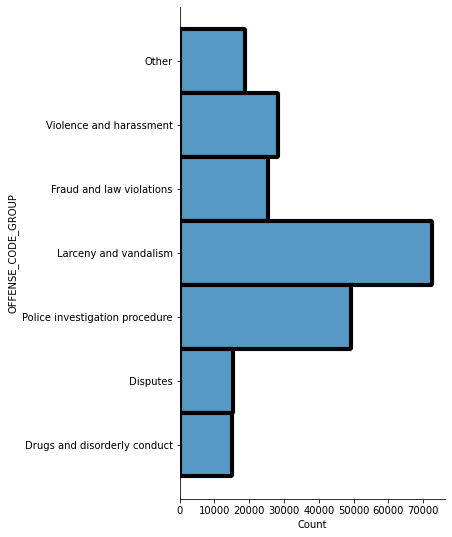

In [37]:
g = sns.displot(inter2, y="OFFENSE_CODE_GROUP")
g.fig.set_size_inches(8,8)

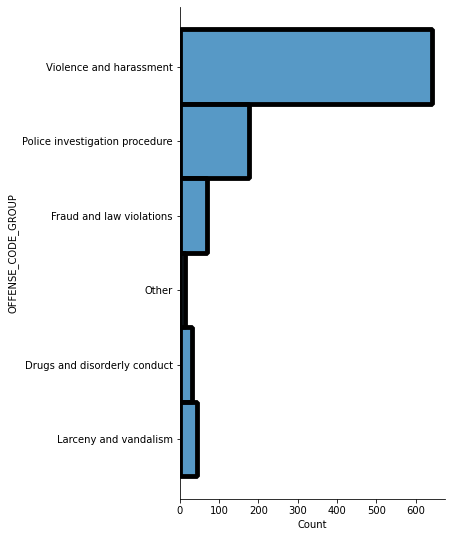

In [38]:
shootings = inter2['OFFENSE_CODE_GROUP'][inter2["SHOOTING"] == 1].to_frame()

g2 = sns.displot(shootings, y="OFFENSE_CODE_GROUP")
g2.fig.set_size_inches(8,8)

In [39]:
shootings['OFFENSE_CODE_GROUP'].count()

977

In [43]:
focus = inter2[['OFFENSE_CODE_GROUP','SHOOTING','WEEKDAY','HOUR']][inter2["OFFENSE_CODE_GROUP"]\
                .isin(['Violence and harassment','Police investigation procedure','Larceny and vandalism'])]

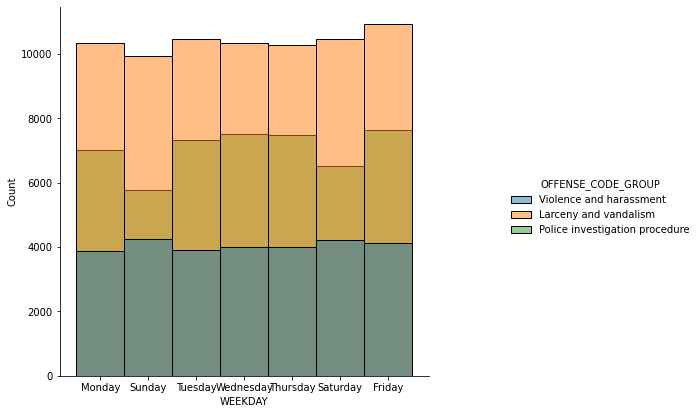

In [44]:
g3 = sns.displot(focus, x="WEEKDAY", hue = 'OFFENSE_CODE_GROUP')
g3.fig.set_size_inches(10,6)

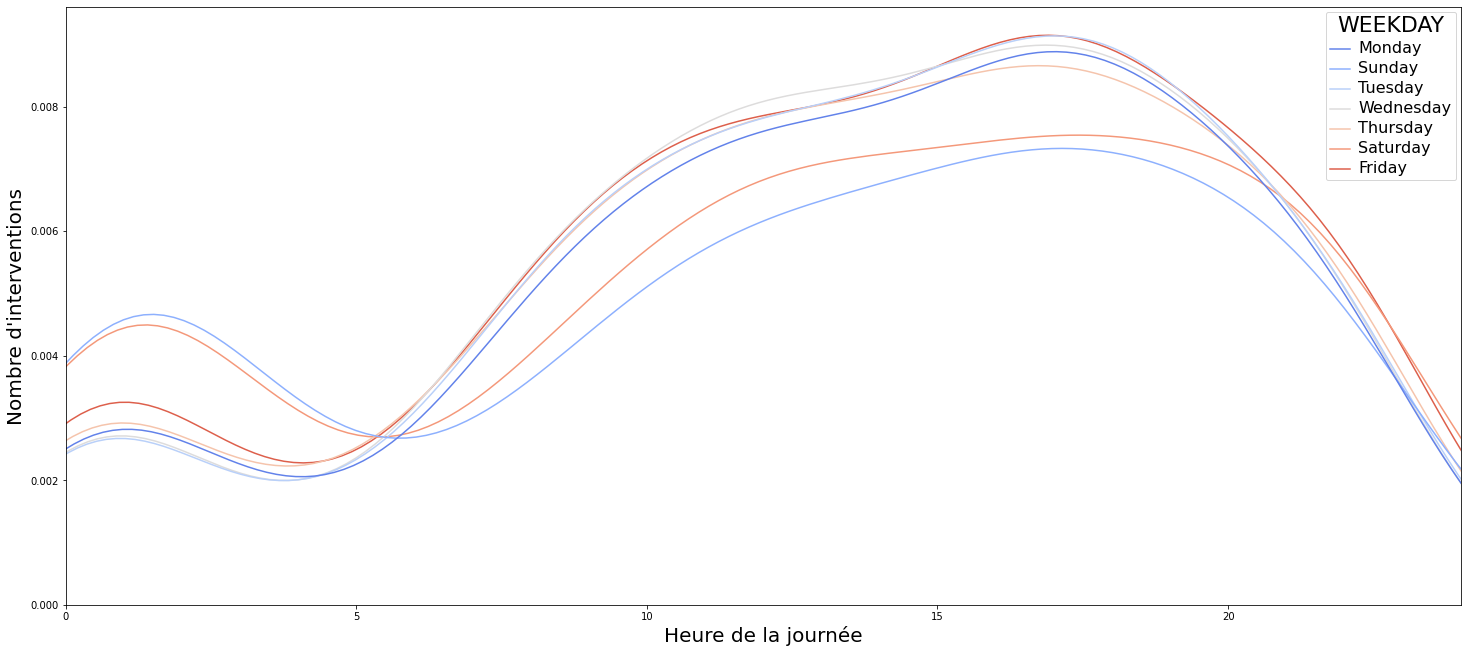

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 11)

b = sns.kdeplot(data = focus,x='HOUR',hue='WEEKDAY',multiple='layer',\
            palette='coolwarm',ax = ax,bw_adjust=2)
plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.setp(ax.get_legend().get_title(), fontsize='22')
b.set_xlabel("Heure de la journée",fontsize=20)
b.set_ylabel("Nombre d'interventions",fontsize=20)
plt.xlim(0, 24)
plt.show();

In [ ]:
sns.color_palette("flare", as_cmap=True)
g4 = sns.displot(inter2, x="WEEKDAY", hue = 'NAME')
g4.fig.set_size_inches(10,6)

# A word of conclusion

Congratulations for going through the exercise 🎉

If you wish to pursue your analysis at some point, note that all datasets (and many others) are publicly available online, on the [Analyze Boston](https://data.boston.gov) website.

Besides, if you are interested in the topic, you can start by reading the work of Nobel Prize laureate Gary Becker, who was the first to model crime as a rational phenomenon, similarly to an economic decision. This model, although it has limitations, marked a breakthrough in the study of crime and paved the way for many empirical studies that further analysed the socio-economic determinants of illegal activities. 

👉 [Link](https://olis.leg.state.or.us/liz/2017R1/Downloads/CommitteeMeetingDocument/125036) to download a full-text version of "Crime and Punishment: An Economic Approach" by Becker (1968)